# Лекция 8. Классы (продолжение)

* Атрибуты
* Наследование

# Атрибуты

Важно различать, что такое атрибуты класса и атрибуты экземпляра

In [21]:
class MySecondClass:
    # это атрибут класса
    var1 = ["test"]
    
    # это метод класса
    def Method1(self):
        pass
    
    def __init__(self):
        # А вот это создаст атрибут экземпляра во время его создания
        self.var2 = ["test2"]
    
a = MySecondClass()

In [22]:
print(a.var1)
print(a.var2)

['test']
['test2']


In [23]:
a.__dict__

{'var2': ['test2']}

In [24]:
a.__class__.__dict__

mappingproxy({'__module__': '__main__',
              'var1': ['test'],
              'Method1': <function __main__.MySecondClass.Method1(self)>,
              '__init__': <function __main__.MySecondClass.__init__(self)>,
              '__dict__': <attribute '__dict__' of 'MySecondClass' objects>,
              '__weakref__': <attribute '__weakref__' of 'MySecondClass' objects>,
              '__doc__': None})

In [27]:
# Создадим второй экземпляр

b = MySecondClass()

print(f'{a.var1=}')
print(f'{a.var2=}')
print(f'{b.var1=}')
print(f'{b.var2=}')

a.var1=['test']
a.var2=['test2']
b.var1=['test']
b.var2=['test2']


In [28]:
# Немного изменим второй экземпляр

# изменим атрибут экземпляра класса
b.var2.append("!")

print(f'{a.var1=}')
print(f'{a.var2=}')
print(f'{b.var1=}')
print(f'{b.var2=}')

a.var1=['test']
a.var2=['test2']
b.var1=['test']
b.var2=['test2', '!']


In [29]:
# Немного изменим второй экземпляр

# изменим атрибут класса
b.var1.append("!")

print(f'{a.var1=}')
print(f'{a.var2=}')
print(f'{b.var1=}')
print(f'{b.var2=}')

a.var1=['test', '!']
a.var2=['test2']
b.var1=['test', '!']
b.var2=['test2', '!']


In [30]:
# Немного изменим второй экземпляр

# изменим атрибут класса
b.var1 = 1

# не совсем то, что ожидается
print(f'{a.var1=}')
print(f'{a.var2=}')
print(f'{b.var1=}')
print(f'{b.var2=}')

a.var1=['test', '!']
a.var2=['test2']
b.var1=1
b.var2=['test2', '!']


При присваивании значения, будет создан атрибут в экземпляре, если его нет, что приводит к сокрытию атрибута класса.

In [31]:
print(f'{b.var1=}')
print(f'{b.__class__.var1=}')

b.__dict__

b.var1=1
b.__class__.var1=['test', '!']


{'var2': ['test2', '!'], 'var1': 1}

# Наследование

Наследование является очень мощным механизмом, который позволяет повторно эффективно использовать существующий код. В Python'е через наследование можно настраивать поведение классов. __Помним, что self - это ссылка на текущий экземпляр класса.__

In [7]:
class C2:
    pass

class C3:
    pass

# Наследование
# Мы просто перечисляем классы внутри скобок
class C1(C2, C3):
    pass

В Python наследование, фактически, позволяет выстроить цепочку объектов, среди которых будет искать необходимый атрибут.

> `isinstance(obj, class_or_tuple)` - позволяет проверить, является ли объект потомком какого-то класса

In [8]:
a = C1()
print(isinstance(a, C2))

True


In [9]:
a = C2()
print(isinstance(a, C3))

False


In [65]:
# Это можно делать для любых объектов
print(isinstance(1, str))
print(isinstance(1, int))

False
True


## Перегрузка методов 

In [51]:
class Employee:
    def __init__(self):
        pass
    
    def coefficient(self):
        return 1.0
    
    def computeSalary(self):
        return 10000 * self.coefficient()
    
    def promote(self):
        pass
    
    def retire(self):
        pass

Если мы захочем ввести новый тип сотрудников со специальными правками, то мы могли бы просто скопировать-вставить этот класс и в этой копии что-то изменить. Это неправильный путь. Лучше использовать наследование:

In [52]:
class Engineer(Employee):
    def computeSalary(self):
        return 20000 * self.coefficient()

In [53]:
person1 = Employee()
person2 = Employee()
person3 = Engineer()

for person in [person1, person2, person3]:
    print(person.computeSalary())

10000.0
10000.0
20000.0


## Особенности перегрузки

Позволяют настроить внутреннее состояние экземпляра класса

In [12]:
class Employee:
    def __init__(self, name, pay, job="Employee"):
        self._name = name
        self._pay = pay
        self._job = job
        
    def giveRaise(self, percent):
        self._pay *= (1 + percent)
    
    def computeSalary(self):
        return self._pay
    
    def __str__(self):
        return f'[{self._job}] {self._name}: {self.computeSalary()}'

In [13]:
person1 = Employee("John", 10000)
person1.giveRaise(.10)

print(person1)

[Employee] John: 11000.0


Нам нужно модифицировать метод, отвечающий за повышение зарплаты

In [14]:
class Engineer(Employee):
    def giveRaise(self, percent, bonus=0.1):
        # Плохой способ, так как копирование-вставка
        self._pay *= (1 + percent + bonus)

In [15]:
class Engineer(Employee):
    def giveRaise(self, percent, bonus=0.1):
        # Оптимальный, мы по полной используем старый код
        Employee.giveRaise(self, percent + bonus)  

In [16]:
# обратите внимание, что вызван конструктор предка
person2 = Engineer("Jack", 10000)
person2.giveRaise(.00)

print(person2)

[Employee] Jack: 11000.0


## Перегрузка конструкторов

Теперь нам хотелось бы настроить атрибут `_job`, так как его значение логически зависит от конкретного класса

In [17]:
class Engineer(Employee):
    def __init__(self):
        self._job = "Engineer"
        
    def giveRaise(self, percent, bonus=0.1):
        Employee.giveRaise(self, percent + bonus)  
     
# получаем ошибку, так как тут у объекта уже есть конструктор
person2 = Engineer("Jack", 10000)

TypeError: __init__() takes 1 positional argument but 3 were given

In [18]:
# а так у нас будут отсутствовать атрибуты из Employee

person2 = Engineer()
person._name

NameError: name 'person' is not defined

In [19]:
class Engineer(Employee):
    def __init__(self, name, pay):
        # нам нужно явно проинициализировать Employee
        Employee.__init__(self, name, pay, job="Engineer")
        
    def giveRaise(self, percent, bonus=0.1):
        Employee.giveRaise(self, percent + bonus)  

In [20]:
person2 = Engineer("Jack", 10000)
print(person2)

[Engineer] Jack: 10000


In [21]:
person2.__dict__

{'_name': 'Jack', '_pay': 10000, '_job': 'Engineer'}

## Ромбовидное наследование

In [189]:
class C1:
    def print(self):
        print("C1")
        
class C2:
    def print(self):
        print("C2")
        
class C3(C1, C2):
    pass

# Берется первый в списке
C3().print()

C1


In [190]:
# лучше делать так

class C3(C1, C2):
    def print(self):
        C1.print(self)
        
C3().print()

C1


In [230]:
# можно использовать автоматическую экранировку имен, чтобы не испортить поведение родительских классов

class C1:
    X = 15
    def methodC1(self):
        print(self.X)
        
class C2:
    X = 51
    def methodC2(self):
        print(self.X)
        
class C3(C1, C2):
    pass

a = C3()
# не то, что хотели бы получить
a.methodC1()
a.methodC2()


15
15


In [234]:

class C1:
    __X = 15
    def methodC1(self):
        print(self.__X)
        
class C2:
    __X = 51
    def methodC2(self):
        print(self.__X)
        
class C3(C1, C2):
    pass

a = C3()
# не то, что хотели бы получить
a.methodC1()
a.methodC2()

dir(a)

15
51


['_C1__X',
 '_C2__X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'methodC1',
 'methodC2']

## Примеси

Достаточно интересный способ использования наследования. Можно создать класс, кототый реализует какое-то четкое поведение, но самостоятельно никогда не используется. Нужен только для уточнение поведения других классов.

In [219]:
class AttributeInsiderMixin:
    """Примесь, которая выводит атрибуты экземпляра"""
    def insideJob(self):
        print(self.__class__.__name__, ":")
        for key in self.__dict__:
            print(f"\t => {key:>15s} = {self.__dict__[key]}")

In [220]:
AttributeInsiderMixin?

Init signature: AttributeInsiderMixin()
Docstring:      Примесь, которая выводит атрибуты экземпляра
Type:           type
Subclasses:     


In [225]:
class Engineer(Employee, AttributeInsiderMixin):
    def __init__(self, name, pay):
        # нам нужно явно проинициализировать Employee
        Employee.__init__(self, name, pay, job="Engineer")
        
        # использование двойного подчеркивания экранирует имя переменной
        self.test = "testing"
        
    def giveRaise(self, percent, bonus=0.1):
        Employee.giveRaise(self, percent + bonus)  
        
    def print(self):
        print(self.__test)

In [226]:
person = Engineer("Jack", 10000)

person.insideJob()

Engineer :
	 =>           _name = Jack
	 =>            _pay = 10000
	 =>            _job = Engineer
	 =>            test = testing


## Функторы

Можно создать класс, которые ведет себя как функция

In [179]:
class Filter:
    def __init__(self, thr):
        self._thr = thr
        
    def __call__(self, x):
        return x < self._thr
    
functor = Filter(10)
functor(17)

# Создадим массив чисел
series = [i for i in range(20)]
print(series)

# проверим, можем ли мы использовать класс как функцию
print(list(map(functor, series)))

print(list(filter(functor, series)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Абстрактные классы

Можно создать класс, который нельзя использовать, но он будет являться подсказкой для программистов, которые будут использовать ваш фреймворк.

In [185]:
class Model:
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()
        
m = Model()
m.fit("", "")

NotImplementedError: 

# Перегрузка операций

С помощью классов можно настраивать поведение классов при использовании в специфических ситуациях.  Мы уже знакомы со __str__ и __repr__, но есть более интересные аспекты перегрузки операций

In [212]:
class MyClass:
    """Пример работы с длинной"""
    def __len__(self):        
        return 100
    
len(MyClass())

100

In [213]:
class MyClass:
    """Пример работы с преобразованием к логическому типу"""
    def __bool__(self):        
        return False
    
bool(MyClass())

False

In [198]:
class MyClass:
    """Пример работы с индексами"""
    def __init__(self):
        self._my_dict = {}
        
    def __setitem__(self, index, value):
        self._my_dict[index] = value
        
    def __getitem__(self, index):
        if index not in self._my_dict:
            # Мы создаем исключительную ситуацию
            raise IndexError                                
        else:
            return self._my_dict[index]
    
m = MyClass()
m[0] = "asd"
m[1] = "sdf"
m[5] = "zxc"

m[5]

'zxc'

In [199]:
# Просто проходиться по индексам от 0 до пока не получит исключение IndexError
for el in m:
    print(el)

asd
sdf


In [208]:
class RangeSquare:
    """Пример работы с протоколом итераций"""
    def __init__(self, start, stop):
        self._start = start
        self._value = start - 1
        self._stop = stop

    def __iter__(self):
        """
        Должен возвращать объект-итератор (не обязательно сам класс)
        """
        return self
    
    def __next__(self):
        if self._value >= self._stop:
            # self._value = self._start - 1
            raise StopIteration
        self._value += 1
        return self._value**2
    
m = RangeSquare(2, 5)
it = iter(m)
next(it), next(it)

(4, 9)

In [210]:
m = RangeSquare(2, 5)
for v in m:
    print(v)

4
9
16
25


In [211]:
# А вот второй раз не сработает
for v in m:
    print(v)

и много других операций

# Домашняя работа

## Задача 1

Создать абстрактный класс `Spline`, который является базовой заготовкой для [сплайнов](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%BB%D0%B0%D0%B9%D0%BD). Данный класс должен определять некий обязательный интерфейс, также данный класс должен быть функтором.

Создать два класса `LinearSpline`(обязательно) и `CubicSpline`(опционально), которые являются потомками `Spline` и реализуют его интерфейс. `LinearSpline` реализует интерполяцию полиномом первой степени, `QuadraticSpline` - полиномом третьей степени.

Таким образом, в результате вы должны получить сплайн-объект, который как-то инициализируется с помощью $N$ пар точек $(x, y)$ и позволяет получить значение $y$ для любого значения $x$. Фактически, ваш класс будет восстанавливать функцию $y = f(x)$ с некоторой точностью.

__Сторонние библиотеки и модули использовать нельзя__

In [23]:
# Топорный вариант

class Spline:
    def __call__(self, x):
        return self.At(x)
        
    def At(self, x):
        raise NotImplementedError

в этом случае экземпляр класса нельзя будет создать

In [30]:
from abc import ABC, abstractmethod

class Spline(ABC):
    def __call__(self, x):
        return self.At(x)
    
    @abstractmethod
    def At(self, x):
        pass

In [187]:
class Linear(Spline):
    def __init__(self, points, *, extrapolate=True):
        points = list(points)
        if len(points) < 2:
            raise ValueError
            
        self._x = [p[0] for p in points]
        self._y = [p[1] for p in points]
        self._a = min(x)
        self._b = max(x)
        self._extrapolate = extrapolate
        

    def At(self, x):
        k = None
        b = None
        x0 = None
        
        if x <= self._a:
            if self._extrapolate:
                k = (self._y[0] - self._y[1])/(self._x[0] - self._x[1])
                b = self._y[0]
                x0 = self._x[0]
            else:
                raise ValueError
                
        if x >= self._b:
            if self._extrapolate:
                k = (self._y[-2] - self._y[-1])/(self._x[-2] - self._x[-1])
                b = self._y[-1]
                x0 = self._x[-1]
            else:
                raise ValueError
        
        for i in range(len(self._x) - 1):
            if self._x[i] <= x <= self._x[i+1]:
                k = (self._y[i+1] - self._y[i])/(self._x[i+1] - self._x[i])
                b = self._y[i]
                x0 = self._x[i]
                break
            
        return k*(x-x0) + b

x = [v*v for v in range(-10, 10)]
y = [v for v in x]

s = Linear(zip(x, y), extrapolate=True)
print(s(8.9))
print(s(15))

8.9
15.0


Здесь нужно было воспользоваться формулами с википедии

$$
S_i(x) = A_i + B_i (x - x_i) + C_i (x - x_i)^2 + D_i (x - x_i)^3, x \in [x_{i-1}, x_{i}]
\\
h_i = x_i - x_{i-1}
\\
A_i = f(x_i)
\\
B_i  =  \frac{A_i - A_{i-1}}{h_i} + \frac{h_i}{3} (2C_i + C_{i-1})
\\
D_i = \frac{1}{3}\frac{C_i - C_{i-1}}{h_i}
\\
C_{i-1} h_{i} 
+ 2 C_{i} (h_{i} + h_{i+1}) 
+ C_{i+1} h_{i+1}
= 
3 \frac{A_{i+1} - A_{i}}{h_{i+1}} - 3\frac{A_{i} - A_{i-1}}{h_{i}} 
\\
C_0 = 0, C_N = 0
$$

In [149]:
class Cubic(Spline):
    def __init__(self, points):
        points = list(points)
        if len(points) < 3:
            raise ValueError
            
        self._x = [p[0] for p in points]
        self._y = [p[1] for p in points]
        self._a = min(x)
        self._b = max(x)
        self._coeff()
        
    def _coeff(self):
        N = len(self._x)
        # [1] - добавляем для h0, чтобы не падало, оно нигде не используется
        h = [1] + [self._x[i] - self._x[i-1] for i in range(1, N)]
        
        A = [None,]
        B = [None,]
        C = [None,]
        D = [None,]
        for i in range(1, N-1):
            A.append(h[i])
            B.append(2*h[i] + 2*h[i+1])
            C.append(h[i+1])
            
            D.append(
                3*(self._y[i+1] - self._y[i])/h[i+1] - 3*(self._y[i] - self._y[i-1])/h[i] 
            )

        for i in range(2, N-1):
            w = A[i] / B[i-1]
            B[i] -= w * C[i-1]
            D[i] -= w * D[i-1]
            
        self._C = [0 for _ in self._y]
        self._C[-2] = D[-1] / B[-1]
        for i in range(N-3, 0, -1):
            self._C[i] = (D[i] - C[i] * self._C[i + 1]) / B[i]
            
        self._A = self._y
        self._B = [0 for _ in self._A]
        self._D = [0 for _ in self._A]
        
        for i in range(1, N):
            self._B[i] = (self._A[i] - self._A[i-1]) / h[i] + h[i] / 3 * (2 * self._C[i] + self._C[i-1])
            self._D[i] = (self._C[i] - self._C[i-1]) / 3 / h[i] 
        
    def At(self, x):
        for i in range(1, len(self._x)):
            if self._x[i-1] <= x <= self._x[i]:
                answ  = self._A[i] 
                answ += self._B[i] * (x - self._x[i]) 
                answ += self._C[i] * (x - self._x[i])**2
                answ += self._D[i] * (x - self._x[i])**3
                return answ
        raise ValueError
    
x = [v for v in range(-10, 10)]
y = [v*v for v in x]

s = Cubic(zip(x, y))
s(5)

25.0

# Задача 2

Создать класс, который позволяет вычислить определенный интеграл некой функции. Использовать любой метод: метод прямоугольников, метод трапеций, метод квадратур Гаусса. Проверить работу на обычных функциях и на сплайнов из предыдущего задания.

Если вы не знакомы с определенным интегралом, то можете создать процедуру для численного дифференцирования.

__Сторонние библиотеки и модули использовать нельзя__

In [167]:
import math

def Integrate(func, a, b, *, points=1000):
    dx = (b - a) / (points - 1)
    
    s = 0
    for i in range(points - 1):
        s += func(a + i * dx)
    s *= dx
    return s


x = [v/10 for v in range(-10, 10 +1)]
y = [math.sqrt(1-v*v) for v in x]

s = Cubic(zip(x, y))

Integrate(lambda x: math.sqrt(1 - x*x), -1, 1, points=1000) * 2

3.1414873190462855

In [168]:
Integrate(s, -1, 1, points=1000) * 2

3.1213644067312822

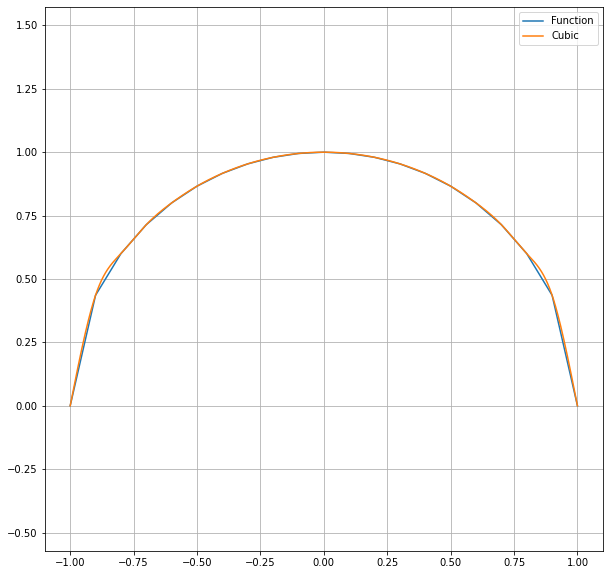

In [184]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 21)
y = np.sqrt(1 - x*x)
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.grid()
plt.plot(x, y, label="Function")

s = Cubic(zip(x, y))
xx = np.linspace(-1, 1, 1001)
yy = [s(xv) for xv in xx]
plt.plot(xx, yy, label="Cubic")

plt.legend()
plt.show()